## Week 1 : Data Manipulation and Exploration
```
- Machine Learning, Innopolis University (Fall semester 2022)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


### Content
```
Lab Plan
1. Data exploration
2. Dealing with categorical features
3. Dealing with missing data
4. Features Scaling
5. Trainset splitting
6. Data Visualization

```

<hr>


![](https://www.gosmar.eu/machinelearning/wp-content/uploads/2021/01/MLOps_pipeline_scaling3.png)

## Test for libraries installation 

In [1]:
import pandas as pd
import numpy as np
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline

## 1. Read Data with Pandas

In [2]:
football_df = pd.read_csv('./football_data.csv', low_memory=False)

football_df.drop(['Date', 'time'], axis=1, inplace=True)

## 2. Data exploration

In [3]:
football_df.head(5)

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,yrdln,yrdline100,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
0,2016121101,13,2,NaN,2,1920.0,5.0,SD,44.0,44.0,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,2016
1,2016121101,13,2,1.0,2,1920.0,0.0,SD,47.0,53.0,...,0.330475,0.968025,0.031975,0.940170,0.059830,0.031975,0.027855,0.024299,0.003556,2016
2,2016121101,13,2,1.0,2,1910.0,10.0,CAR,7.0,7.0,...,NaN,0.940170,0.059830,0.947575,0.052425,0.059830,-0.007405,NaN,NaN,2016
3,2016121101,13,2,2.0,2,1877.0,33.0,CAR,9.0,9.0,...,-3.766159,0.947575,0.052425,0.953601,0.046399,0.052425,-0.006025,0.036136,-0.042161,2016
4,2016121101,13,2,3.0,2,1868.0,9.0,CAR,9.0,9.0,...,0.000000,0.953601,0.046399,0.912354,0.087646,0.046399,0.041247,0.041247,0.000000,2016


In [4]:
types = football_df.dtypes
print("Number categorical featues:", sum(types=='object'))
print(types)

Number categorical featues: 36
GameID         int64
Drive          int64
qtr            int64
down         float64
TimeUnder      int64
              ...   
Win_Prob     float64
WPA          float64
airWPA       float64
yacWPA       float64
Season         int64
Length: 100, dtype: object


In [5]:
football_df.describe()

,GameID,Drive,qtr,down,TimeUnder,TimeSecs,PlayTimeDiff,yrdln,yrdline100,ydstogo,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season
count,1.000000e+04,10000.000000,10000.000000,8448.000000,10000.000000,9992.000000,9984.000000,9980.000000,9980.000000,10000.000000,...,3929.000000,9357.000000,9357.000000,9309.000000,9309.000000,10000.000000,9.845000e+03,3930.000000,3923.000000,10000.0
mean,2.016372e+09,12.444900,2.584500,1.991951,7.322400,1686.264011,20.739283,28.566433,47.859218,7.158400,...,-0.400785,0.547408,0.453126,0.547667,0.452708,0.470946,1.673133e-03,0.014596,-0.009764,2016.0
std,3.996451e+05,7.075561,1.131542,1.006399,4.685216,1064.437980,20.795996,12.533362,24.737534,4.844632,...,2.008014,0.300660,0.300744,0.302591,0.302650,0.319106,4.684680e-02,0.056720,0.065689,0.0
min,2.016121e+09,1.000000,1.000000,1.000000,0.000000,-849.000000,0.000000,1.000000,1.000000,0.000000,...,-12.156367,0.000000,0.000000,0.000000,0.000000,0.000000,-9.719480e-01,-0.943119,-0.939447,2016.0
25%,2.016122e+09,6.000000,2.000000,1.000000,3.000000,772.000000,5.000000,19.000000,29.000000,3.000000,...,-0.950799,0.298087,0.183309,0.295898,0.179571,0.172491,-1.375776e-02,-0.009758,-0.017638,2016.0
50%,2.016122e+09,12.000000,3.000000,2.000000,7.000000,1800.000000,18.000000,30.000000,48.000000,9.000000,...,0.000000,0.565156,0.435096,0.568334,0.431754,0.486653,-7.985673e-07,0.004151,0.000000,2016.0
75%,2.017010e+09,18.000000,4.000000,3.000000,11.000000,2575.000000,37.000000,38.000000,69.000000,10.000000,...,0.469628,0.817714,0.702465,0.820549,0.705156,0.750169,1.278280e-02,0.033391,0.009991,2016.0
max,2.017010e+09,30.000000,5.000000,4.000000,15.000000,3600.000000,908.000000,50.000000,99.000000,36.000000,...,8.079540,1.000000,1.000000,1.000000,1.000000,1.000000,9.739204e-01,0.898214,0.932194,2016.0


## 3. Profiling the data

In [6]:
from pandas_profiling import ProfileReport

report = ProfileReport(football_df)
# report.to_file('data_profile_report.html')

### One-hot-encoding of categorical feature
1. Why to encode the categorical feature?
2. Why one-hot-encoding form? why not give each category in the feature a specific code value?
3. How many new features will be added? What if we have some missing values, which is the case in this dataset?
4. When is it appropriate to give each category an encoding value?


<span style="color:red"> Task : In the next cell, implement the function that take a dataframe, name of the categorical feature, and the encoder object. Then, adds new features that represent the one-hot-encoding form of this feature and ignore the missing values in it (encode them to zeros).

In [7]:
from category_encoders import OneHotEncoder

cat_feats = football_df.select_dtypes(include=['object']).columns.tolist()
encoder = OneHotEncoder(cols=cat_feats, handle_unknown='ignore')

encoder.fit(football_df)

# Write your code here (1 line)
# Transform the data 
encoded_data = encoder.transform(football_df)

## 4. Data Imputation
#### Imputation is filling the missing values in the dataset.
Several issues to address:
1. Why we should fill them? Why not remove the rows that has missing values?
2. Filling it with constant value for each value, but what's it?
3. (Advanced) Estimate the filling value, each row for its own.
4. How to choose the imputation strategy?
5. (Not related only to imputations) Why we fit the imputer to the training data not the concatenation of both train and test set?


<span style="color:red">Task :  In the next cell, implement a function that returns the count of nan/empty cells in a dataframe.</span><br>
<span style="color:red">Task : Use SimpleImputer object, fit it to the trainset, then transform both the train and test sets.</span>

In [8]:
from sklearn.impute import SimpleImputer
import numpy as np

#TODO: Complete a function that returns number of empty cells 
def count_nans(df):
    return np.sum(df.isna().sum())

# Print number of empty cells (1 line)
print("#Empty missing data cells in the dataset = ", count_nans(encoded_data))

# Write your code here (3-4 lines):
# create the imputer object.
# fit the imputer.
# transform the data

print("After Imputing:")
# Print number of empty cells in the data(1 line)
print("#Empty cells in dataset =", count_nans(imputed_data))

#Empty missing data cells in the dataset =  42015
After Imputing:
#Empty cells in dataset = 0


## 5. Features Scaling
1. Why we need to make all the features have same range of values?
<span style="color:blue"> This has something to do with some machine learning algorithms.
First, gradient-related algorithms (e.g., linear regression, logisitic regression, deep learning algorithms): feature scaling is important for the congergence of the algorithms as the gradient in one direction/feature could need more/long steps than the others and the scaling solves this issue and make the training stable and relatively faster.
Second, distance related algorithms (e.g., KNN, K-means). These algorithms depends on the distance between samples both in training and testing. Having features with different ranges would affect the distance measure and produce biased prediciton to the features with larger range.
for example: having two features (length in KM [10: 10000] and temperature in C° [20: 40]). The distance value will be much affected by the length feature.</span>

1. What are the different strategies to scale the features? <br>
    * <span style="color:blue">Min-Max scaling: transform all features to fall in this range: [0, 1].</span><br>
$$x_i = \frac{x_i - min(\mathbf{x})}{max(\mathbf{x}) - min(\mathbf{x})}$$
    * <span style="color:blue">Standard scaling: transform all features to have mean = 0 and standard deviation = 1. And by assuming that all features follow normal distribution, we can say that standard scaling turns featrues to be $\sim N(0,1)$.</span> <br>
$$x_i = \frac{x_i - mean(\mathbf{x})}{stdev(\mathbf{x})}$$ <br>
    * <span style="color:blue">Robust scaling: robust to the outliers that may affect the previous methods in calculating their mean, stdev, min, or max. It uses the interquartile range to scale the features according to it.
Interquartile is the range between the 1st quartile and 3rd quartile.</span> <br>
$$x_i = \frac{x_i - Q_1(\mathbf{x})}{Q_3(\mathbf{x}) - Q_1(\mathbf{x})}$$ 

3. How to choose the strategy?
<span style="color:blue">Same as in imputation strategy, using a validation set or using cross-validation.

<span style="color:red">  In the following cell, scale all the features with a scaler from your choice. Fit the scaler on the full data set and transform both it.</span>

In [9]:
from sklearn.preprocessing import RobustScaler

# Write your code here (4 lines):
# choose the scaler class.
# create the scaler object.
# fit it to the data.
# transform the data

## 6. Trainset splitting
Issues that lead to trainset splitting:
1. How we will measure the performance of our model?
<span style="color:blue"> Measuring performance on the trainset is not a good idea intuitively, as to estimate the generalization error, we need to evaluate the model on a data that wasn't seen before.
So we need to split the dataset that we have to two parts trainset and testset.
2. How we will tune the hyperparamters? Can it be done with testset?
<span style="color:blue"> If we tuned the hyperparamters on the testset, this will be considered as Data leakage as the hyperparams were tuned on the set that represent the evaluation, so there's a high chance that it will overfit the testset and fails to generalize (i.e., get high test accuracy but fails in production for example).
So, it is a must to split the data into 3 parts:
(70%) trainset to train the params , (10%) validation set to tune the hyperparameters (it can be used for other stuff like early stopping (tbe)), and (20%) testset to evaluate the model finally.

Issues to think of:
1. Is is the best strategy to get the best estimate for the true risk/performance of the system?
<span style="color:blue"> There's a chance that the testset is biased. So, a better way to estimate the true generalization error is to use cross validation.
Cross validation is a method where the dataset, is divided into k equally sized folds then we train on k-1 folds and test on the left one and repeat this process k times for each fold and get k estimates, finally we average all of these k accuracies to represent the final accuracy.
2. (Advanced) How to choose between two models?
If you have two models one with test accuracy 90% and the other with 91% (averaged from cross valdiation), which one to choose?
<span style="color:blue"> The naive/fast approach is to use the model with higher accuracy. But what if these estimates are not significantly different (we got them by chance), then a hypothesis test needs to be done.
After testing each model for each fold from the k-folds we can use "Paired t-test" to test if they are significantly different or not.
<br />(more advanced way, which is used in industry: A/B testing, watch about it [here](https://www.youtube.com/watch?v=zFMgpxG-chM))

<span style="color:red"> TASK : In the next task, you will split your data into 3 parts, train, test, and validation by ratios: 70%, 20%, and 10% respectively.</span>

In [10]:
from sklearn.model_selection import train_test_split

# TODO: Write your code here (2 lines)

print(x_train.shape, x_test.shape, x_val.shape)

(7000, 13035) (2000, 13035) (1000, 13035)


## 7. Data Visualization
Visualization is key-issue to get some insights and intuition about your dataset.
How to plot 259 features (259-dimensional data)? what we can plot -at maximum- is 2d or 3d data.

Hint: We should reduce the dimension. Read this [article](https://towardsdatascience.com/dimensionality-reduction-ways-and-intuitions-1b5e97592d8e).

So, Let's use UMAP to reduce the dimension of this dataset to be 2D.

In [11]:
from sklearn.decomposition import PCA

dim_reducer = PCA(n_components=2)
x_train_reduced = dim_reducer.fit_transform(x_train)

Let's plot the reduced dataset on a 2D plane.
Use matplotlib to make a scatter plot for the reduced dataset.

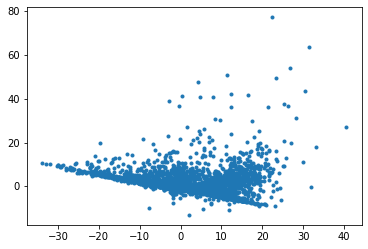

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

# Write code to plot the reduced dataset in a scatter plot.

## 8. Self Practice task

Using the Football dataset follow the steps below:
1. Select `Win_Prob` as target variable 
1. Remove columns with constant value (i.e all the values in the column are equal to zero)
1. Extract features from `Date` and `time` column
1. Remove all columns with more than 99% missing values
1. Remove all columns with 99% distinct values
1. Split the data into train (80%) and test(20%) sets. 
1. Split the train data into train (80%) and validation sets. 
1. Encode categorical data using a different encoder (not One Hot encoder) : see [Category Encoders](https://contrib.scikit-learn.org/category_encoders/index.html) for a full list. remember that you fit the encoder on train data only and then transform test data
1. Impute missing values

<span style="color:red"> NOTE : Make use of the insights from pandas profiling report</span>